In [1]:
!pip install xgboost scikit-learn pandas numpy matplotlib seaborn joblib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import joblib

In [24]:
df = pd.read_csv("heart_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())

Shape: (700, 14)

Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Missing values:
 age         1
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [31]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
print(np.isnan(X_train_scaled).sum())
print(np.isnan(X_test_scaled).sum())


0
0


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

def evaluate_model(model, Xtr, Xte):
    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(Xte)[:, 1]
    else:
        y_prob = y_pred

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    return acc, auc, prec, rec, f1, mcc, y_pred


In [38]:
import os
os.makedirs("model", exist_ok=True)


In [39]:
from sklearn.linear_model import LogisticRegression
import joblib

lr = LogisticRegression(max_iter=2000)

lr_metrics = evaluate_model(lr, X_train_scaled, X_test_scaled)

joblib.dump(lr, "model/logistic.pkl")

print("Logistic Regression:", lr_metrics[:6])


Logistic Regression: (0.8642857142857143, np.float64(0.9458741830065359), 0.8271604938271605, 0.9305555555555556, 0.8758169934640523, np.float64(0.7334903277245138))


In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt_metrics = evaluate_model(dt, X_train, X_test)

joblib.dump(dt, "model/dt.pkl")

print("Decision Tree:", dt_metrics[:6])


Decision Tree: (0.9142857142857143, np.float64(0.9158496732026143), 0.96875, 0.8611111111111112, 0.9117647058823529, np.float64(0.8344307145012471))


In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn_metrics = evaluate_model(knn, X_train_scaled, X_test_scaled)

joblib.dump(knn, "model/knn.pkl")

print("KNN:", knn_metrics[:6])


KNN: (0.8785714285714286, np.float64(0.9307598039215685), 0.8985507246376812, 0.8611111111111112, 0.8794326241134752, np.float64(0.7579377588780307))


In [42]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb_metrics = evaluate_model(nb, X_train, X_test)

joblib.dump(nb, "model/nb.pkl")

print("Naive Bayes:", nb_metrics[:6])


Naive Bayes: (0.8642857142857143, np.float64(0.9385212418300654), 0.8354430379746836, 0.9166666666666666, 0.8741721854304636, np.float64(0.7312633192052387))


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)

rf_metrics = evaluate_model(rf, X_train, X_test)

joblib.dump(rf, "model/rf.pkl")

print("Random Forest:", rf_metrics[:6])


Random Forest: (0.9428571428571428, np.float64(0.9936683006535948), 0.9848484848484849, 0.9027777777777778, 0.9420289855072463, np.float64(0.8891622235155443))


In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    eval_metric="logloss",
    use_label_encoder=False
)

xgb_metrics = evaluate_model(xgb, X_train_scaled, X_test_scaled)

joblib.dump(xgb, "model/xgb.pkl")

print("XGBoost:", xgb_metrics[:6])


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:29:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: (0.9357142857142857, np.float64(0.979983660130719), 0.9701492537313433, 0.9027777777777778, 0.935251798561151, np.float64(0.8738123138895527))


In [45]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "KNN",
        "Naive Bayes",
        "Random Forest",
        "XGBoost"
    ],
    "Accuracy": [lr_metrics[0], dt_metrics[0], knn_metrics[0], nb_metrics[0], rf_metrics[0], xgb_metrics[0]],
    "AUC": [lr_metrics[1], dt_metrics[1], knn_metrics[1], nb_metrics[1], rf_metrics[1], xgb_metrics[1]],
    "Precision": [lr_metrics[2], dt_metrics[2], knn_metrics[2], nb_metrics[2], rf_metrics[2], xgb_metrics[2]],
    "Recall": [lr_metrics[3], dt_metrics[3], knn_metrics[3], nb_metrics[3], rf_metrics[3], xgb_metrics[3]],
    "F1": [lr_metrics[4], dt_metrics[4], knn_metrics[4], nb_metrics[4], rf_metrics[4], xgb_metrics[4]],
    "MCC": [lr_metrics[5], dt_metrics[5], knn_metrics[5], nb_metrics[5], rf_metrics[5], xgb_metrics[5]]
})

results


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.864286,0.945874,0.827160,0.930556,0.875817,0.733490
1,Decision Tree,0.914286,0.915850,0.968750,0.861111,0.911765,0.834431
2,KNN,0.878571,0.930760,0.898551,0.861111,0.879433,0.757938
3,Naive Bayes,0.864286,0.938521,0.835443,0.916667,0.874172,0.731263
4,Random Forest,0.942857,0.993668,0.984848,0.902778,0.942029,0.889162
5,XGBoost,0.935714,0.979984,0.970149,0.902778,0.935252,0.873812


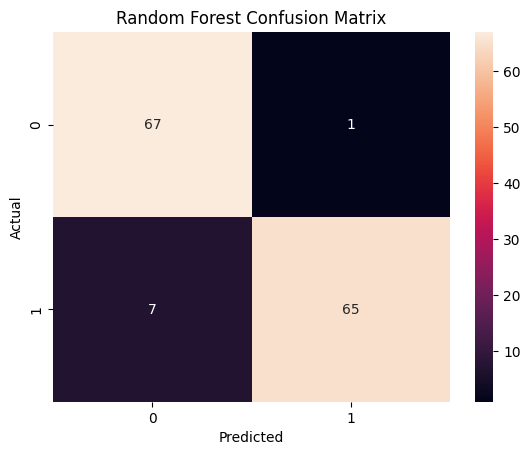

              precision    recall  f1-score   support

           0       0.91      0.99      0.94        68
           1       0.98      0.90      0.94        72

    accuracy                           0.94       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.94      0.94       140



In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_rf = rf_metrics[6]

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred_rf))


In [47]:
import joblib
joblib.dump(scaler, "model/scaler.pkl")


['model/scaler.pkl']